In [11]:
%matplotlib inline

# Three-armed bandit

## Simulation parameters

| $N$ | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|------|------|-----|-----|
| $10000$ | $0.4$ | $0.6$ | $0.8$ |

## The oracle value

For $N = 10000$, the theoretically maximized expectation of aggregated rewards over $N$ time slots is
$$\max \mathbb{E} \left[ \sum\limits_{t=1}^{N} r_{I(t)} \right] = \max \sum\limits_{t=1}^{N} \theta_{I(t)} = N \cdot \theta_{I^*} = 10000 \cdot 0.8 = 8000$$

## Reward function

In [6]:
from machine import get_reward

for i in [0, 1, 2, 3, 4, 0.5]:
    print('get_reward({}) returns {}'.format(i, get_reward(i)))

get_reward(0) returns -1
get_reward(1) returns 1
get_reward(2) returns 1
get_reward(3) returns 1
get_reward(4) returns -1
get_reward(0.5) returns -1


# Basic setup

In [33]:
import numpy as np
import matplotlib.pyplot as plt


N = 10000
number_of_repetition = 100

# $\epsilon$-greedy

In [34]:
epsilon = 0.1

theta_hat = [0.0, 0.0, 0.0]
count = [0, 0, 0]
reward_list = []
aggregated_reward_list = []
average_reward_list = []
for t in range(1, N + 1):
    # Choose I randomly with probability epsilon
    if np.random.binomial(1, epsilon):
        I = np.random.randint(1, 4)
    # Get greedy with probability (1 - epsilon)
    else:
        I = np.argmax(theta_hat) + 1
    
    # Get the current reward
    reward = get_reward(I)
    
    # Store the current reward and the aggregated reward
    reward_list.append(reward)
    aggregated_reward_list.append(np.sum(reward_list))
    
    # Calculate the current average reward and store it
    average_reward_list.append(np.average(reward_list))
    
    count[I-1] += 1
    theta_hat[I-1] += (reward - theta_hat[I-1]) / count[I-1]

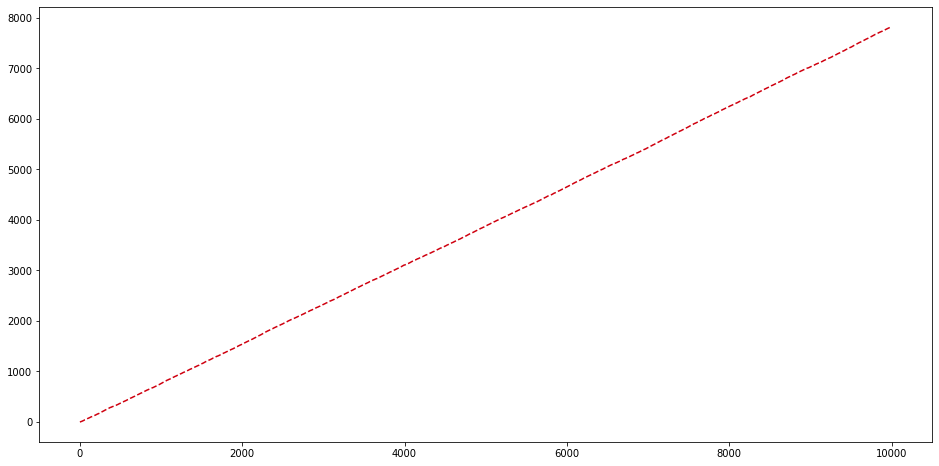

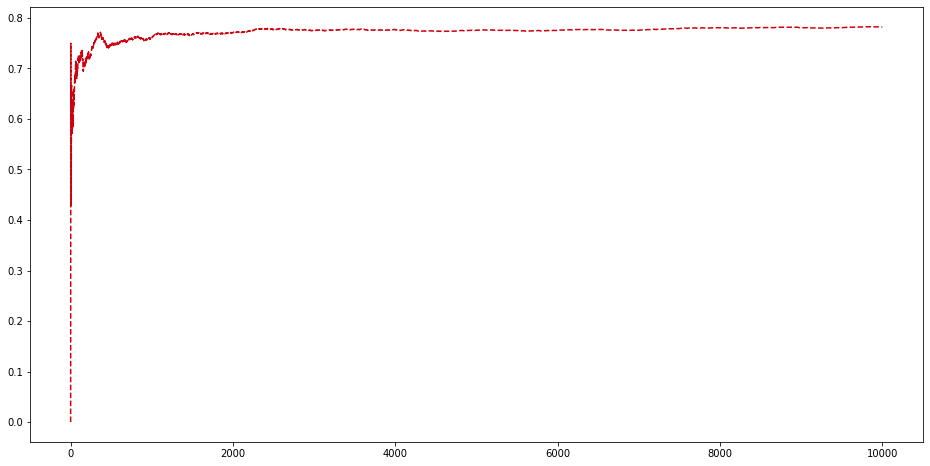

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(range(1, N + 1), aggregated_reward_list, '--', color='#cf000f')

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(range(1, N + 1), average_reward_list, '--', color='#cf000f')

plt.show()